In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import random
import seaborn as sns
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='tuenguyen92', api_key='slYjvo1SuYBSJrDEieDa')

In [3]:
#reading csv file

combined_countries= pd.read_csv("Happiness avg.csv")


In [4]:
combined_countries=combined_countries.dropna()

In [5]:
combined_countries_without_year = combined_countries[['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [6]:
combined_countries_without_year.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5.444004,5.066582,1.015001,32.218184,0.603038,0.085486,0.416267
std,1.103708,4.326319,0.304275,32.414365,0.227963,0.160499,0.340490
min,2.523000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.000000
25%,4.628000,0.949000,0.811000,0.693000,0.443000,-0.034000,0.082000
50%,5.456200,1.572000,0.922494,1.052000,0.608830,0.098000,0.306000
75%,6.198000,9.487000,1.269000,66.305145,0.797565,0.191000,0.780623
max,7.842000,11.647000,1.644000,76.953000,0.974998,0.598000,0.939000


In [7]:
score_per_country = combined_countries.set_index(["Country or region"])["Score"]

In [8]:
score_per_country

Country or region
Finland        7.632
Norway         7.594
Denmark        7.555
Iceland        7.495
Switzerland    7.487
               ...  
Lesotho        3.512
Botswana       3.467
Rwanda         3.415
Zimbabwe       3.145
Afghanistan    2.523
Name: Score, Length: 613, dtype: float64

In [9]:
combined_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             613 non-null    object 
 1   Score                         613 non-null    float64
 2   GDP per capita                613 non-null    float64
 3   Social support                613 non-null    float64
 4   Healthy life expectancy       613 non-null    float64
 5   Freedom to make life choices  613 non-null    float64
 6   Generosity                    613 non-null    float64
 7   Perceptions of corruption     613 non-null    float64
 8   Year                          613 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 47.9+ KB


In [10]:
#separating the happiness score by year 
score_2018 = combined_countries[(combined_countries["Year"] == 2018)]
score_2019 = combined_countries[(combined_countries["Year"] == 2019)]
score_2020 = combined_countries[(combined_countries["Year"] == 2020)]
score_2021 = combined_countries[(combined_countries["Year"] == 2021)]

In [11]:
#Grouping by "country" and taking the mean of each.
country_score_2018 = score_2018.groupby(["Country or region"]).mean ()["Score"]
country_score_2019 = score_2019.groupby(["Country or region"]).mean ()["Score"]
country_score_2020 = score_2020.groupby(["Country or region"]).mean ()["Score"]
country_score_2021 = score_2021.groupby(["Country or region"]).mean ()["Score"]

In [12]:
country_score_2018.head()

Country or region
Afghanistan    3.632
Albania        4.586
Algeria        5.295
Angola         3.795
Argentina      6.388
Name: Score, dtype: float64

In [13]:
scores_by_year = pd.DataFrame({
    "2018": country_score_2018,
    "2019": country_score_2019,
    "2020": country_score_2020,
    "2021": country_score_2021})

In [14]:
scores_by_year

,2018,2019,2020,2021
Country or region,,,,
Afghanistan,3.632,3.203,2.5669,2.523
Albania,4.586,4.719,4.8827,5.117
Algeria,5.295,5.211,5.0051,4.887
Angola,3.795,NaN,NaN,NaN
Argentina,6.388,6.086,5.9747,5.929
...,...,...,...,...
Venezuela,4.806,4.707,5.0532,4.892
Vietnam,5.103,5.175,5.3535,5.411
Yemen,3.355,3.380,3.5274,3.658


In [15]:
#Part II. Visualization

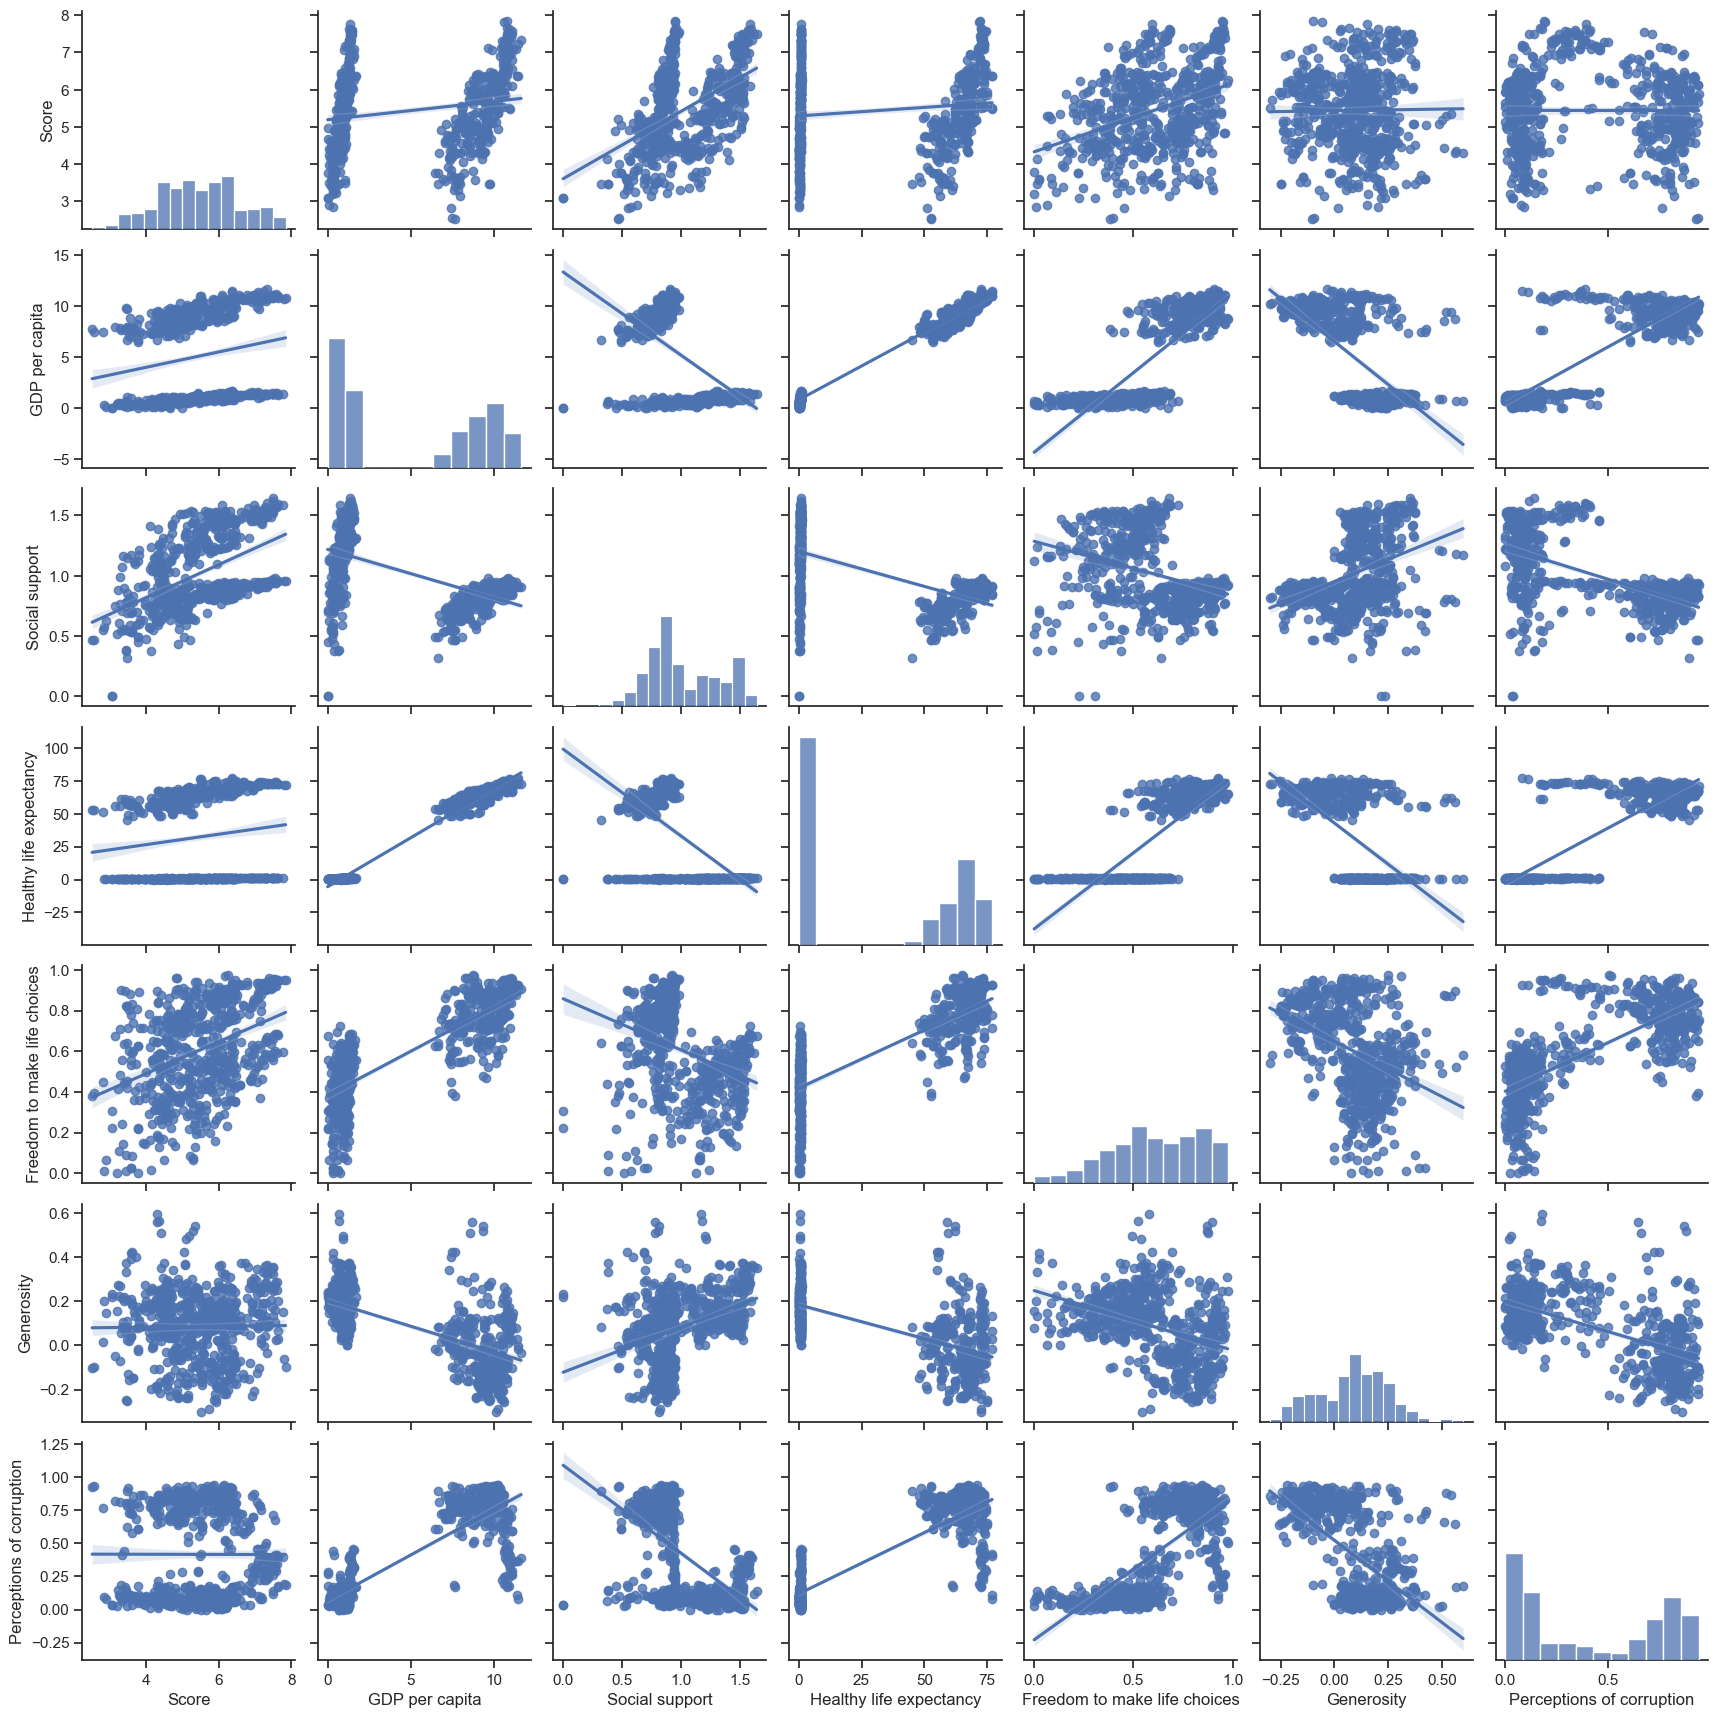

In [16]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(combined_countries_without_year, kind="reg")

<AxesSubplot:>

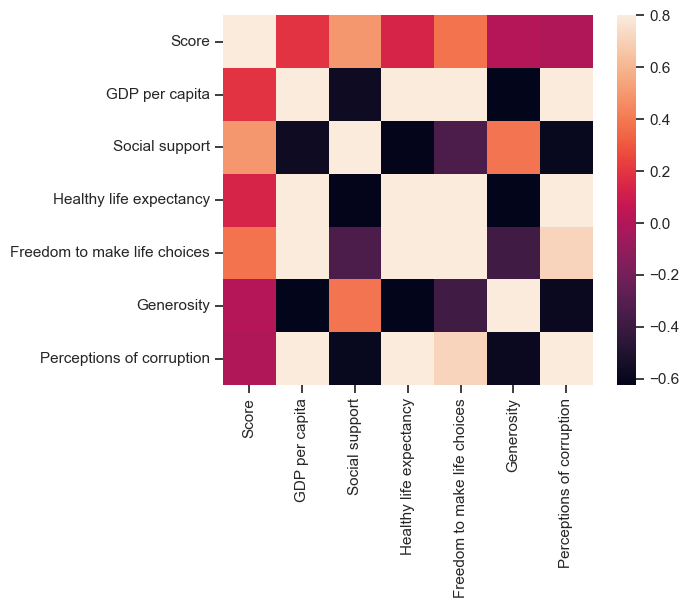

In [17]:
#Check correlation of each values 
corrmat = combined_countries_without_year.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

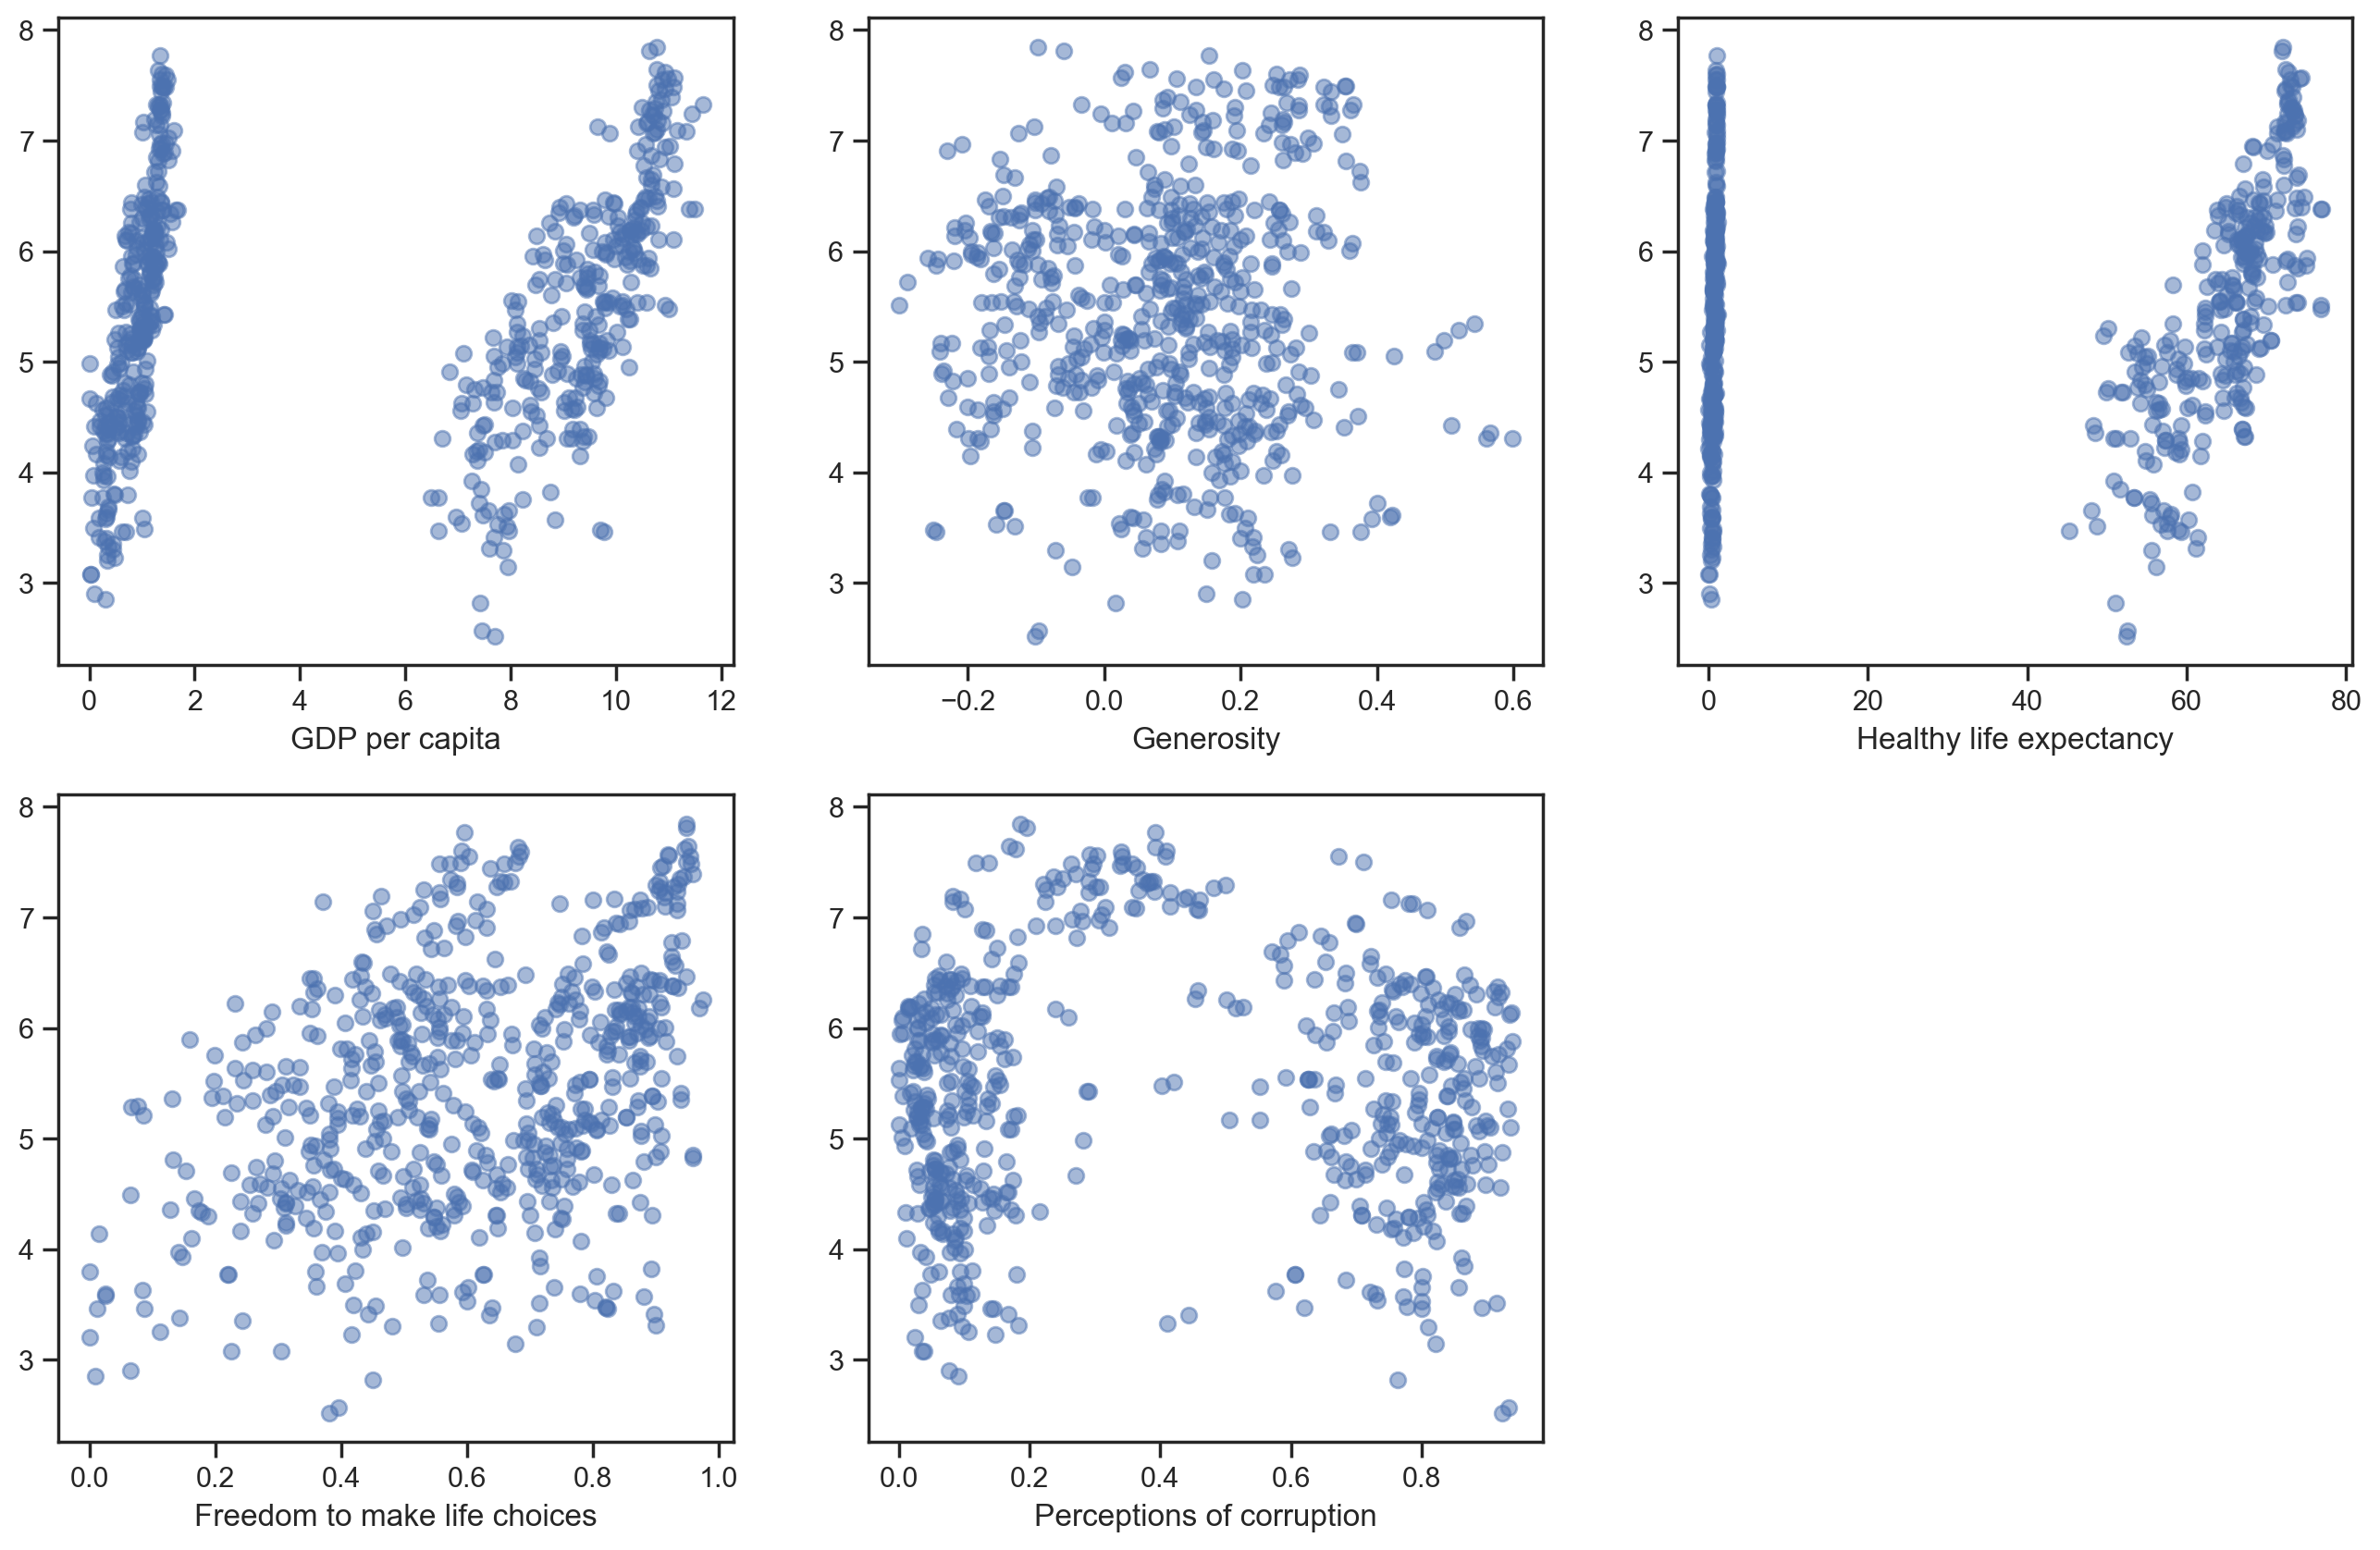

In [18]:
#let's check highly correlated columns separately 

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate(['GDP per capita', 'Generosity', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.scatter(combined_countries_without_year[key], combined_countries_without_year['Score'], alpha=0.5)

In [19]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #loading necessary libraries for mapping
init_notebook_mode(connected=True)
import plotly

data = dict(type = 'choropleth',
           locations = combined_countries['Country or region'],
           locationmode = 'country names',
           z = combined_countries['Score'], 
           text = combined_countries['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'eckert2'}))
fig = go.Figure(data = data, layout=layout)
plotly.offline.plot(fig) 
iplot(fig)